# Assignment 1: Image Search

Assignment description:

https://github.com/CDS-AU-DK/cds-visual/blob/main/assignments/assignment1.md

In [4]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join("..", "CDS-VIS"))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

### 1. Take a user-defined image from the folder

In [5]:
# Define file path
filename = os.path.join("..", "CDS-VIS", "flowers", "image_1304.jpg")

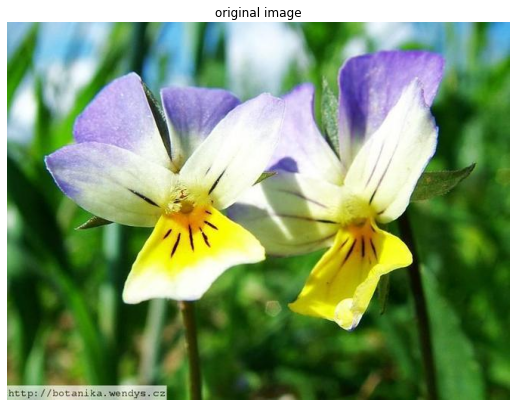

In [6]:
# Load image
image1 = cv2.imread(filename)
jimshow(image1, "original image")

### 2. Calculate the "distance" between the colour histogram of that image and all of the others

In [7]:
filepath = os.path.join("..", "CDS-VIS", "flowers")
flowers = os.listdir(filepath)
                        
all_images = []

for flower in flowers[0:10]:
    all_filepaths = os.path.join("flowers", flower)
    all_images.append(all_filepaths)
    
all_images

['flowers/image_1079.jpg',
 'flowers/image_0772.jpg',
 'flowers/image_1307.jpg',
 'flowers/image_0127.jpg',
 'flowers/image_0479.jpg',
 'flowers/image_1250.jpg',
 'flowers/image_0948.jpg',
 'flowers/image_0964.jpg',
 'flowers/image_0953.jpg',
 'flowers/image_0151.jpg']

#### Plot color histogram for chosen image:

In [8]:
# cv2.calcHist([image], channels, mask, histSize, ranges[, hist[, accumulate]])

- images : it is the source image of type uint8 or float32 represented as “[img]”.
- channels : it is the index of channel for which we calculate histogram.
    - For grayscale image, its value is [0] and
    - color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”.
- histSize : this represents our BIN count. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

In [9]:
def plot_channels (image):
    filepath = os.path.join("..", "CDS_VIS", "flowers", image)
    image = cv2.imread(filepath)
    # split channels
    channels = cv2.split(image)
    # names of colours
    color_names = ["b", "g", "r"]
    # create figure
    plt.figure()
    # add title
    plt.title("Multiple channels")
    # add xlabel
    plt.xlabel("Bins")
    # add ylabel
    plt.ylabel("Number of pixels")

    # loop over our channels
    for channel, color_name in zip(channels, color_names): # Creating a new list containing channels and color_names pairs [(A,1), (B,2), (C,3)]
        # Create a histogram
        hist = cv2.calcHist([channel], [0], None, [256], [0,256])
        # Plot histogram
        plt.plot(hist, color = color_name)
        # Set limit of x-axis
        plt.xlim([0, 256])

[ WARN:0@22.530] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../CDS_VIS/flowers/flowers/image_1079.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22.556] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../CDS_VIS/flowers/flowers/image_0772.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22.570] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../CDS_VIS/flowers/flowers/image_1307.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22.582] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../CDS_VIS/flowers/flowers/image_0127.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22.595] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../CDS_VIS/flowers/flowers/image_0479.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22.607] global /io/opencv/modules/imgcode

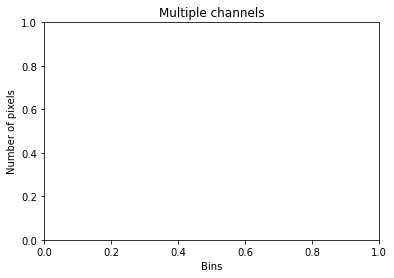

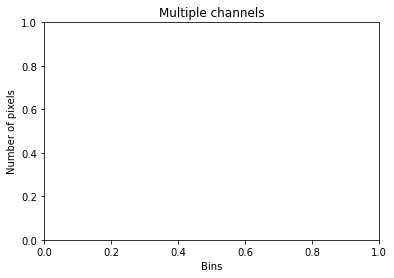

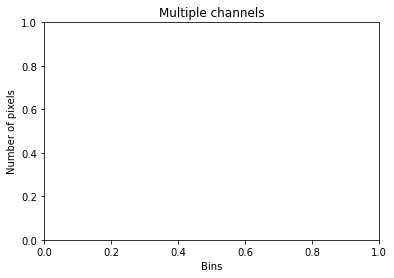

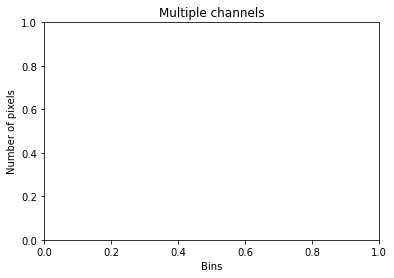

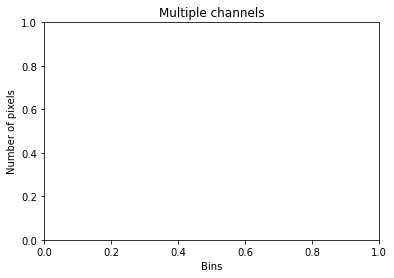

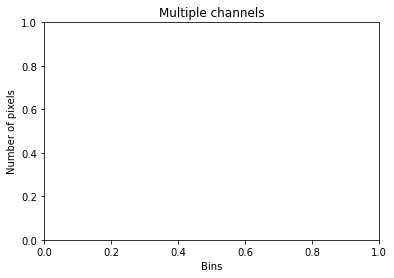

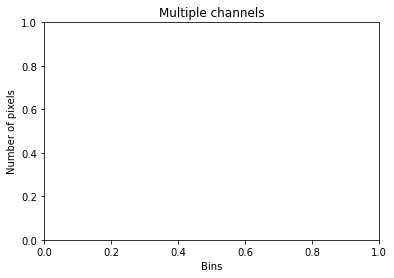

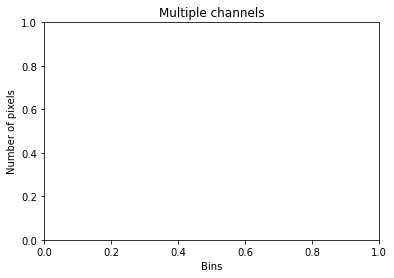

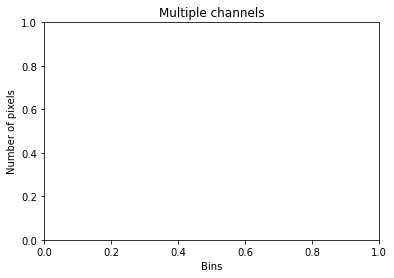

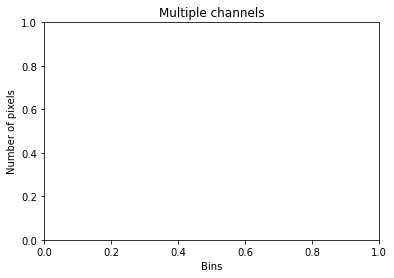

In [10]:
# show the plot
for images in all_images:
    plot_channels(images)

### 3. Find which 3 image are most "similar" to the target image

### 4. Save an image which shows the target image, the three most similar, and the calculated distance score.

### 5. Save a CSV which has one column for the filename and three columns showing the filenames of the closest images in descending order